# ***Dry Bean Dataset `2021`***
***

## Introduction

##### Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.
##### In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira .

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

## Importing required libraries

In [32]:
import numpy as np  #linear algebra
import pandas as pd # a data processing and CSV I/O library

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

## Reading the dataset

In [33]:
dry =pd.read_excel('Dry_Bean_Dataset.xlsx')
dry.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Preprocessing

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Class"]

for col in columns:
    dry[col] = le.fit_transform(dry[col])
    print(le.classes_)
      
dry.head()

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


## EDA

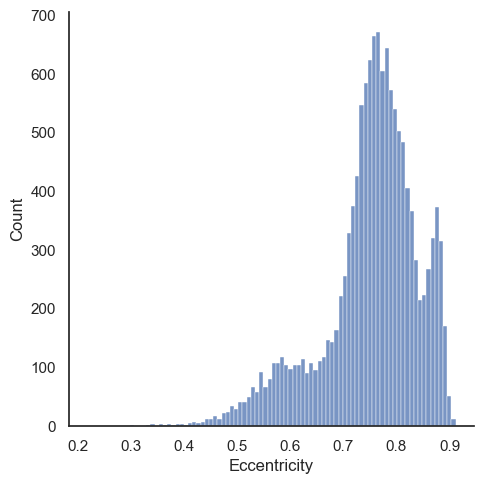

In [35]:
sns.displot(dry['Eccentricity'])

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64


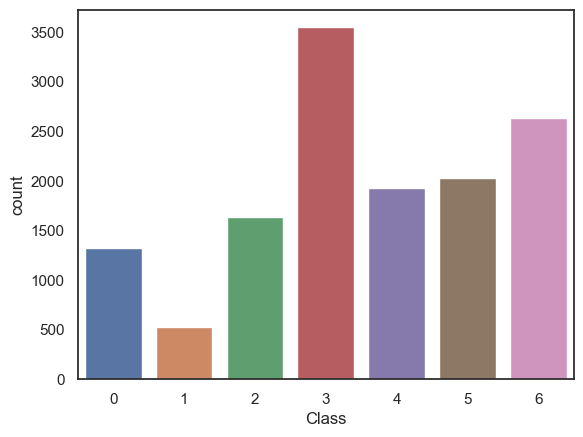

In [36]:
print(dry['Class'].value_counts())
_ = sns.countplot(x='Class', data=dry)

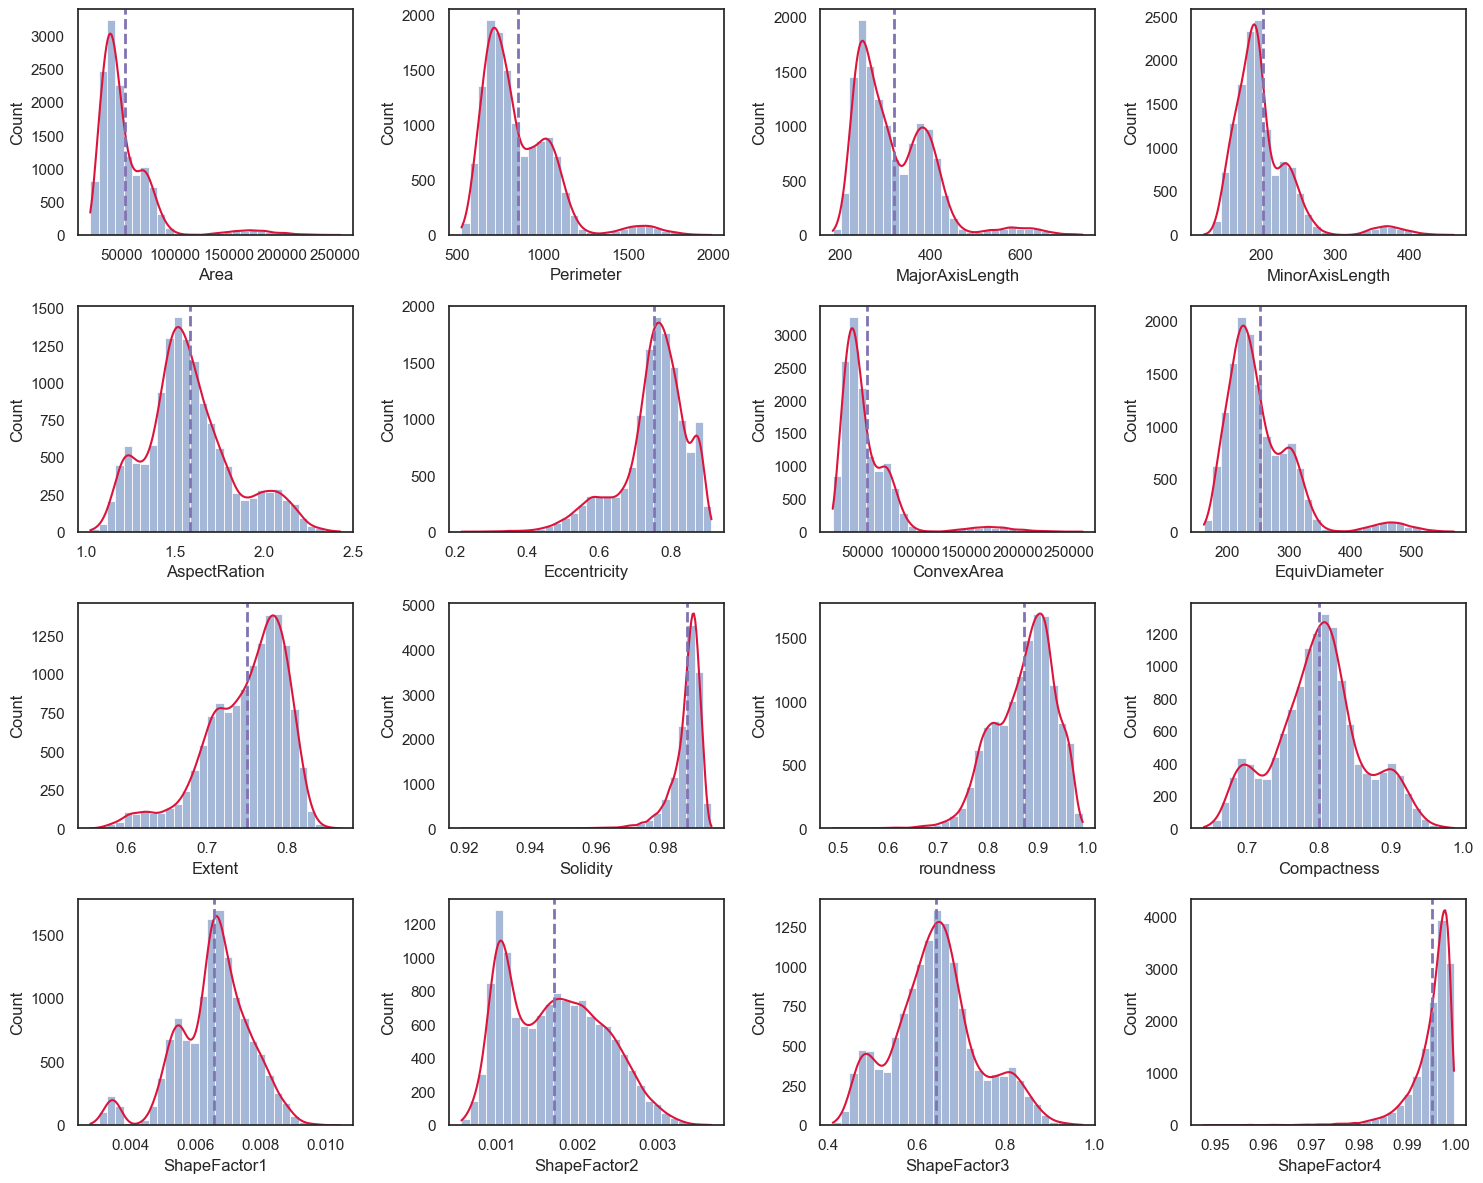

In [37]:
Numeric_cols = dry.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(dry[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=dry[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

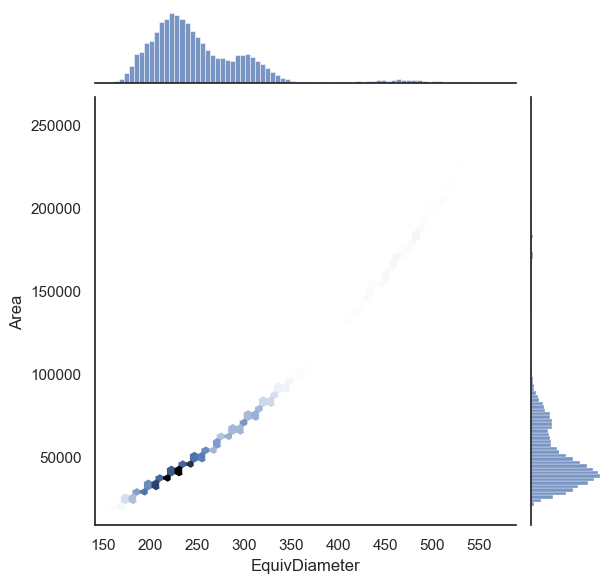

In [38]:

sns.jointplot(x='EquivDiameter', y='Area', data=dry, kind="hex")

<AxesSubplot: xlabel='Perimeter', ylabel='Density'>

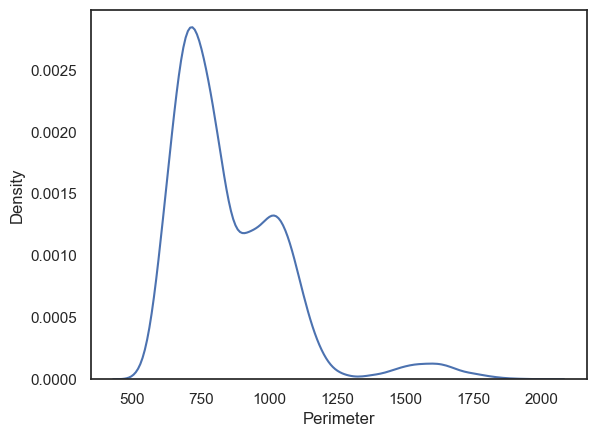

In [39]:
sns.kdeplot(dry['Perimeter'])

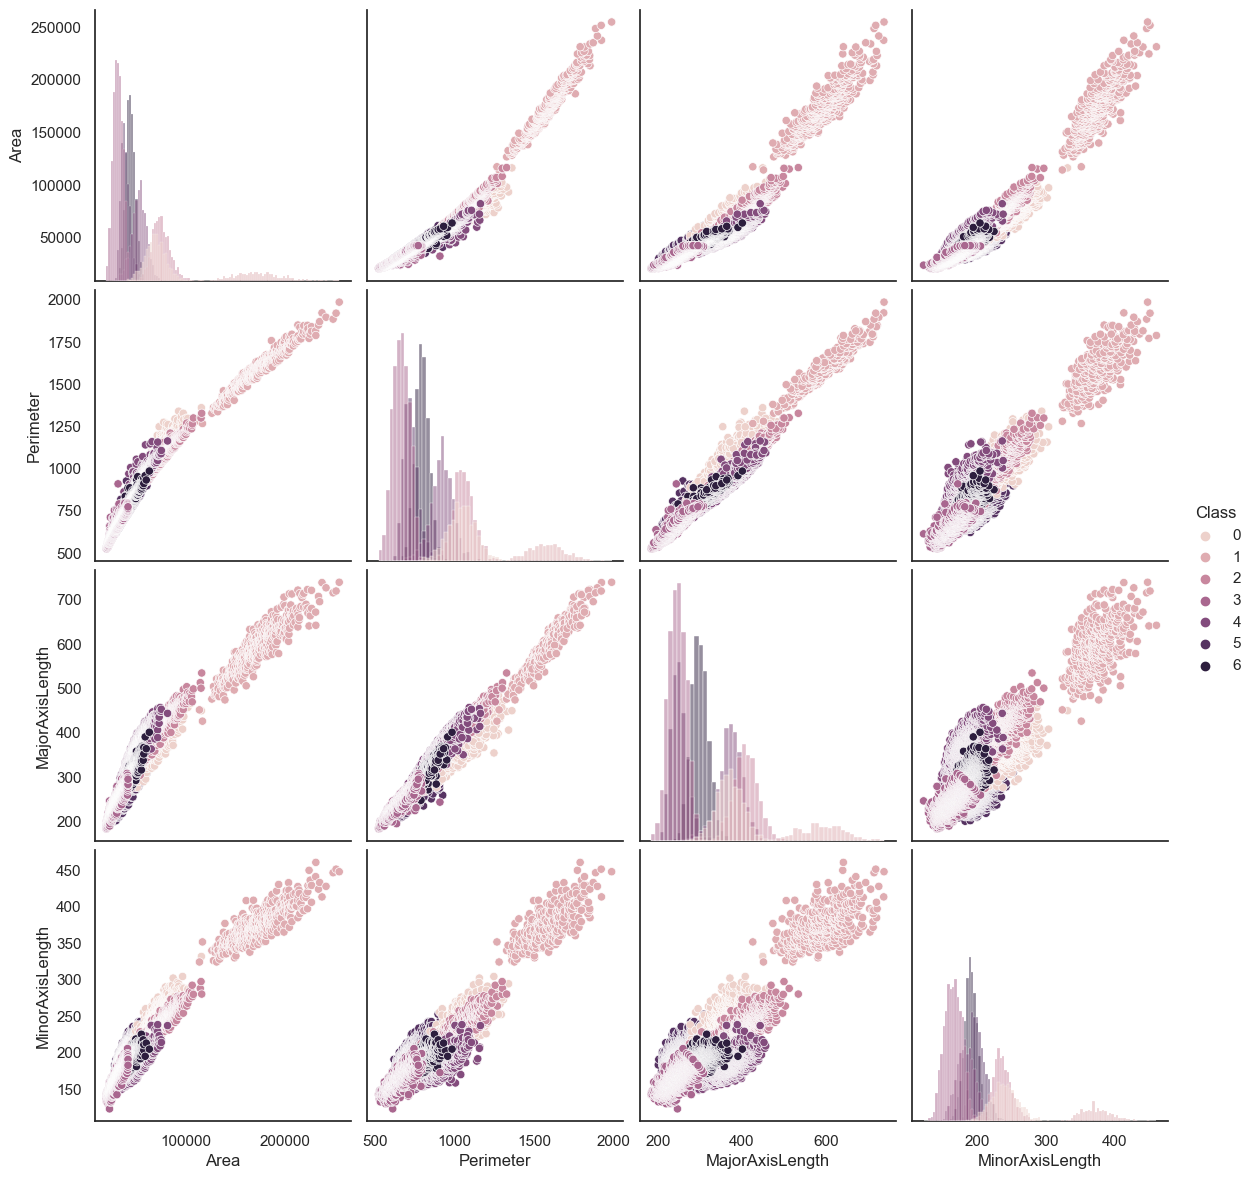

In [40]:
sns.pairplot(dry.drop(['AspectRation','Eccentricity','ConvexArea',	
    'EquivDiameter',	
    'Extent',	
    'Solidity',	
    'roundness',	
    'Compactness',	
    'ShapeFactor1',	
    'ShapeFactor2',	
    'ShapeFactor3',	
    'ShapeFactor4'], axis=1), hue='Class', height=3, diag_kind='hist')

<AxesSubplot: >

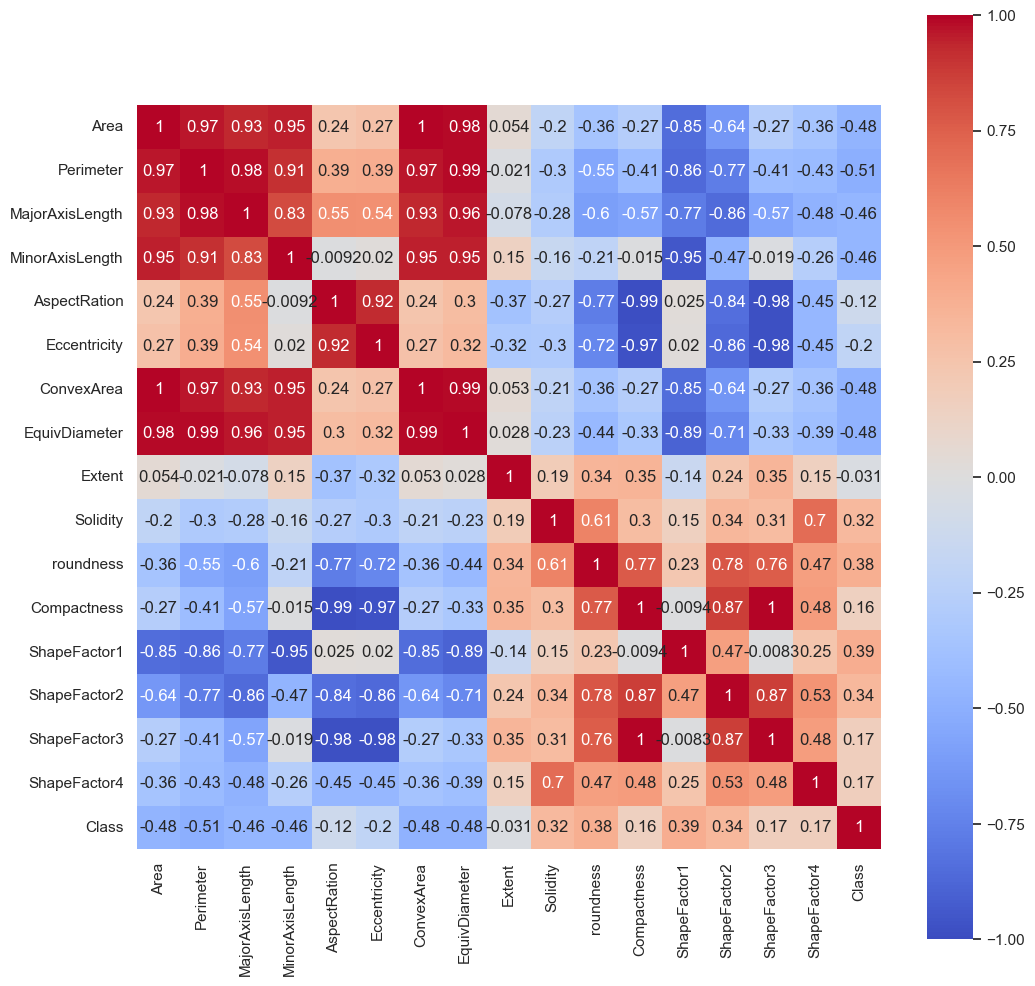

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(dry.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

## Defining X and y 

In [42]:
X = dry[[
    'Area',
    'Perimeter',
    'MajorAxisLength',	
    'MinorAxisLength',	
    'AspectRation',	
    'Eccentricity',
    'ConvexArea',	
    'EquivDiameter',	
    'Extent',	
    'Solidity',	
    'roundness',	
    'Compactness',	
    'ShapeFactor1',	
    'ShapeFactor2',	
    'ShapeFactor3',	
    'ShapeFactor4']].values
y = dry[['Class']]


## Training Models

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)



In [44]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9097
- F1 score: 0.909765
- Precision: 0.909977
- Recall: 0.909717
----------------------------------
Model performance for Test set
- Accuracy: 0.9214
- Fl score: 0.9214
- Precision: 0.9216
- Recall: 0.9214


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.9034
- Fl score: 0.9032
- Precision: 0.9033
- Recall: 0.9034


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.9295
- Fl score: 0.9295
- Precision: 0.9295
- Recall: 0.9295


Support Vector Machine
Model performance for Training set
- Accuracy: 0.6319
- F1 score: 0.597867
- Precision: 0.606115
- Recall: 0.631888
----------------------------------
